In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
df = pd.read_csv('amz_uk_price_prediction_dataset.csv')
df.head(3)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers


In [2]:
df.columns

Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')

Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

    Frequency Tables:
        Generate a frequency table for the product category.
        Which are the top 5 most listed product categories?

In [3]:
#What are the most popular product categories on df
#Generate a frequency table for the product category
df['category'].value_counts()

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [4]:
#Which are the top 5 most listed product categories
Top_5 = df['category'].value_counts().head(5)
Top_5

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

Visualizations:
    Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
    

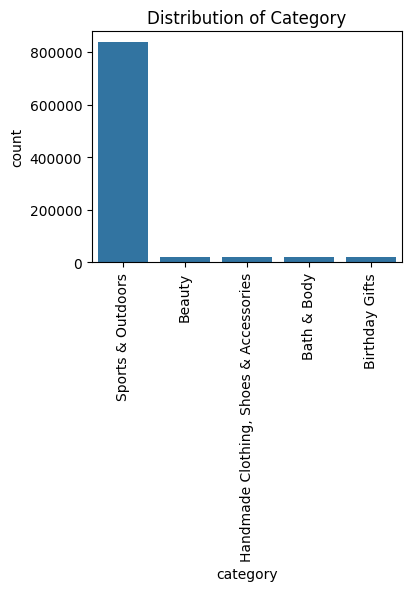

In [5]:
#Display the distribution of products across different categories using a bar chart.
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(4,3))
sns.barplot(Top_5)
plt.xticks(rotation=90)
plt.title("Distribution of Category")
plt.show()

For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings

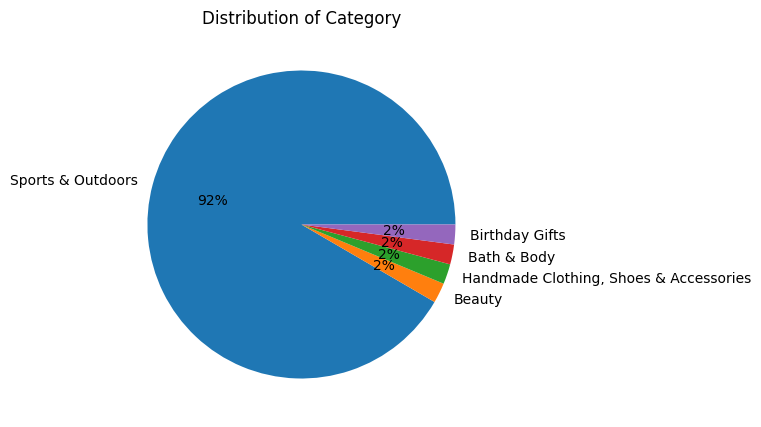

In [11]:
#pie chart of the Categories
plt.figure(figsize=(6,5))
plt.pie(Top_5, labels=Top_5.index, autopct='%1.f%%')
plt.title("Distribution of Category")
plt.show()

Part 2: Delving into Product Pricing
Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

In [12]:
#are there specific price points or ranges that are more common?
#Remove the outlier (IQR method)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3-Q1

clean_df = df[(df['price']>=Q1-1.5*IQR) & (df['price']<= Q3 + 1.5 * IQR)]
clean_df.head(3)



,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers


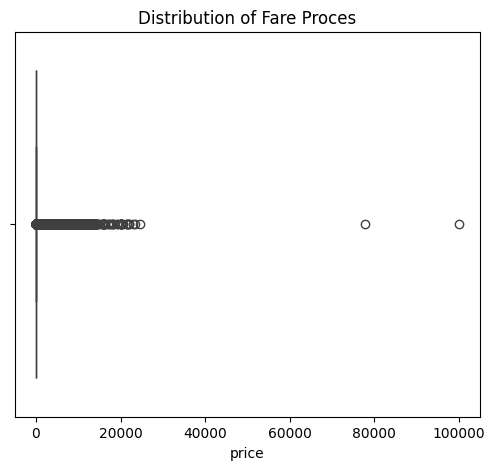

In [13]:

plt.figure(figsize=(6,5))
sns.boxplot(x = df['price'])
plt.title("Distribution of Fare Proces")
plt.show()

Calculate the mean, median, and mode for the price of products

In [ ]:
#Calculate the mean, median, and mode for the price of products (Method1: very complicated method)
stats = pd.Series({
	'mean': df['price'].mean(),
	'median': df['price'].median(),
	'mode': df['price'].mode().iloc[0] if not df['price'].mode().empty else np.nan
})
stats


mean      89.243809
median    19.090000
mode       9.990000
dtype: float64

In [29]:
#Calculate the mean, median, and mode for the price of products (Method2)
stats = df['price'].agg(["mean", "median"])
stats

mean      89.243809
median    19.090000
Name: price, dtype: float64

In [31]:
df['price'].mode()

0    9.99
Name: price, dtype: float64

Determine the variance, standard deviation, range, and interquartile range for product `price`

In [ ]:
df['price'].describe()

count    2.443651e+06
mean     8.924381e+01
std      3.456089e+02
min      0.000000e+00
25%      9.990000e+00
50%      1.909000e+01
75%      4.599000e+01
max      1.000000e+05
Name: price, dtype: float64

In [36]:
Var = df['price'].var()
Var

119445.48532254907

In [34]:
iqr_price = df["price"].quantile(0.75) - df["price"].quantile(0.25)
iqr_price


36.0

How varied are the product prices? Are there any indicators of a significant spread in prices

Interpretation
Measure	Meaning
Variance:	Overall spread (sensitive to outliers)
Std. Dev.:	Typical deviation from mean
IQR	Spread of the middle 50% of prices

How varied are prices?

A large range → presence of very cheap and very expensive products

Std ≫ Mean → highly heterogeneous market

IQR ≪ Range → most products cluster tightly, but a few outliers stretch the range

👉 In e-commerce pricing, a large range + moderate IQR usually means:

Most products are similarly priced, but luxury or bulk items inflate the max price.

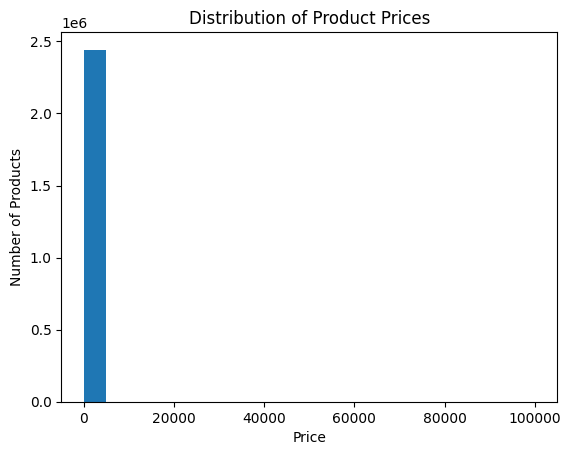

In [38]:
# 3.1 Histogram — Where do most prices fall?
import matplotlib.pyplot as plt

plt.figure()
plt.hist(df["price"], bins=20)
plt.xlabel("Price")
plt.ylabel("Number of Products")
plt.title("Distribution of Product Prices")
plt.show()


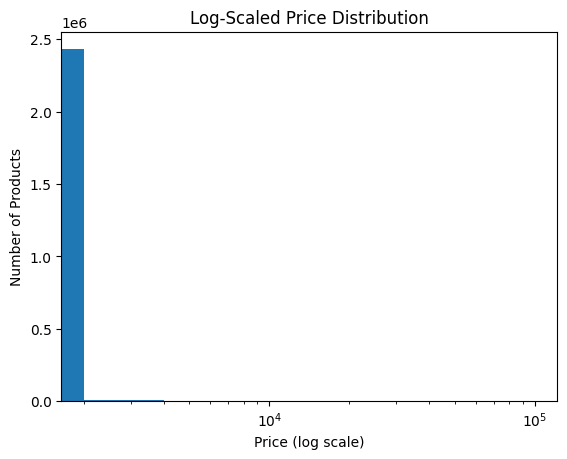

In [39]:
# Log-scale (best solution)
plt.figure()
plt.hist(df["price"], bins=50)
plt.xscale("log")
plt.xlabel("Price (log scale)")
plt.ylabel("Number of Products")
plt.title("Log-Scaled Price Distribution")
plt.show()


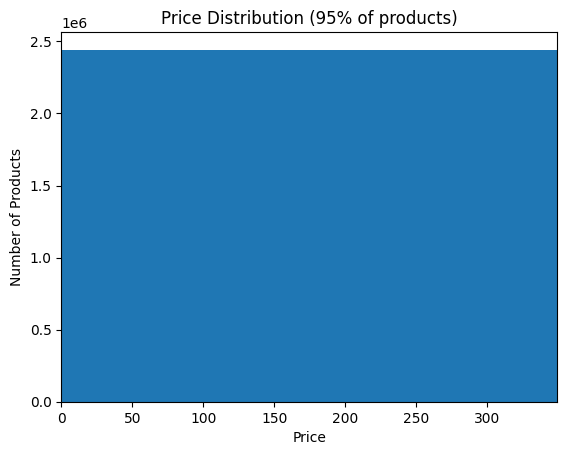

In [41]:
# Limit x-axis to focus on typical prices
plt.figure()
plt.hist(df["price"], bins=20)
plt.xlim(0, df["price"].quantile(0.95))
plt.xlabel("Price")
plt.ylabel("Number of Products")
plt.title("Price Distribution (95% of products)")
plt.show()


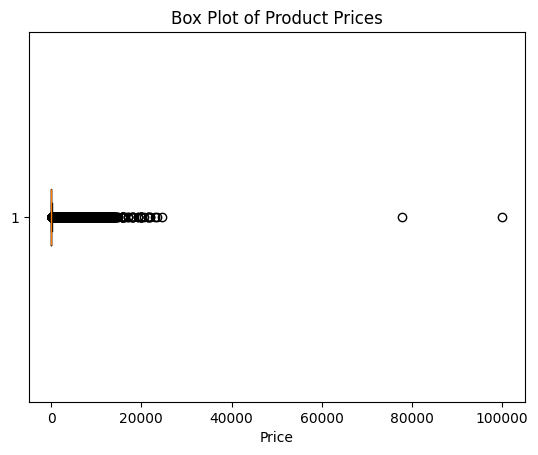

In [42]:
# Box Plot — Are there extreme prices?
plt.figure()
plt.boxplot(df["price"], vert=False)
plt.xlabel("Price")
plt.title("Box Plot of Product Prices")
plt.show()


Interpretation
Box → middle 50% (IQR)

Line inside box → median

Points beyond whiskers → potential outliers